### Данная лекция будет посвящена вопросу машинного обучения, не использующего разметку данных, или Unsupervised learning. Преимуществами такого подхода является простота подготовки датасета, возможность обучения в процессе работы и еще несколько особенностей, которые мы обсудим позже. Сейчас давайте обсудим постановку таких задач обучения без учителя, как кластеризация, снижение размерности и детектирование аномалий

# Кластеризация

Кластеризация - это разделение исходного множества **неразмеченных** данных на несколько групп, которые называются кластерами. На самом деле, произвольное разбиение на подмножества уже является кластеризацией, поэтому нам хотелось бы, чтобы полученные группы обладали некоторыми свойствами. Базовое и самое интуитивно понятное  из них:

Среднее расстояние между объектами кластера ощутимо меньше, чем среднее расстояние между парами объектов, один из которых принадлежит кластеру, а другой - нет.

Поставим эту задачу формально.
_____________________________________
**Дано:**

Пусть X - это пространство объектов, из которого мы набираем обучающую выборку.

$X^N$ = $\{x^i\}_{i=1}^N$- обучающая выборка. Еще раз обратим внимание на то, что в выборке отсутствуют метки y.

$\rho: X × X → [0,∞)$ - функция расстояния между объектами. Важно! Она не обязана являться метрикой, но должна отражать наши представления о понятии близости объектов.

**Найти:**

$y_i \in Y$ - метки принадлежности объектов к **кластерам** такие, что заданное ими разбиение удовлетворяет следующим требованиям:

* Каждый кластер состоит из близких (в смысле нашей функции) объектов
* Объекты разных кластеров далеки друг от друга


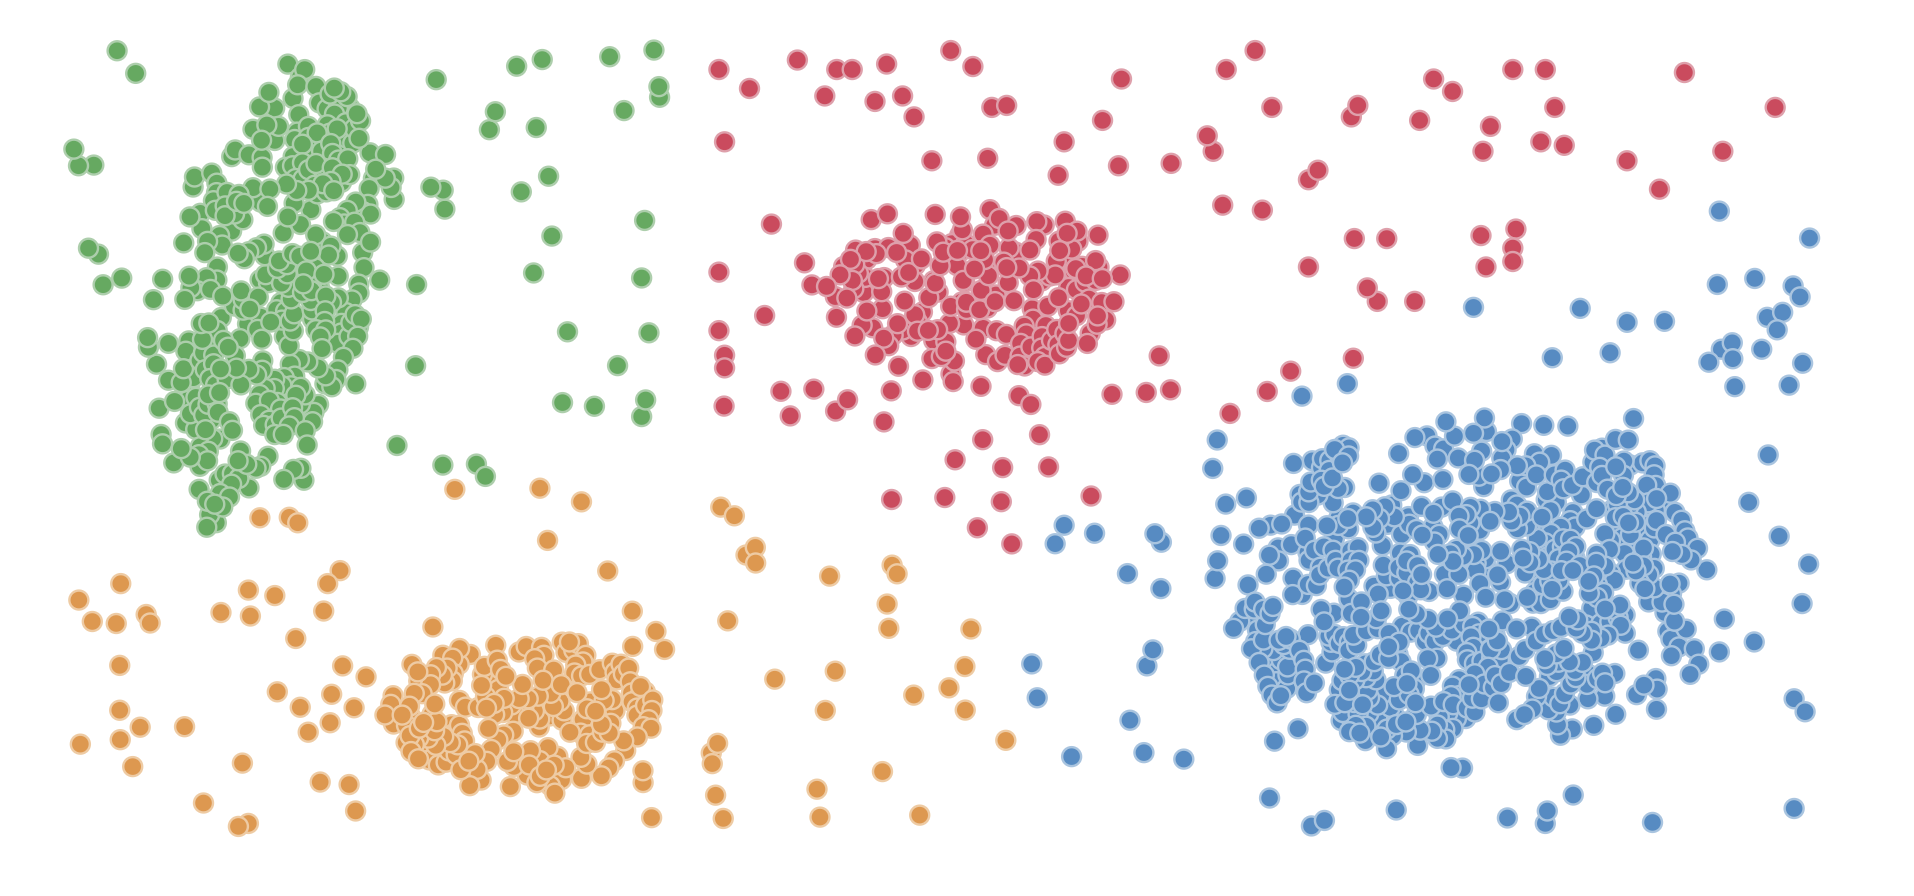

# Сложности такой постановки

Такая постановка задачи кластеризации размыта в виду неопределенности понятий "близкий" и "далекий". Также при решении задачи кластеризации зачастую мы работаем с высокоразмерными данными, которые не можем проанализировать визуально или каким-то еще интуитивным способом. Ровно по этой причине мы и хотим решить эту задачу - в результате ее решения мы получаем некоторое конструктивное описание имеющихся данных. Стоит отметить, что сама постановка такой задачи **предполагает** существование той самой кластерной структуры, которую мы намереваемся выделить. 

Но никто не обещает нам, что данное предположение оправдано. Вполне возможно, что имеющиеся данные выбраны из одного распределения, а реального разделения на кластеры просто нет. В этом случае обнаруженная кластерная структура будет либо тривиальной, либо не отражающей реальной структуры данных.

Все это наводит нас на мысль о том, что задача, которая стоит перед нами, непроста в первую очередь в силу своей неоднозначности и наличия нескольких решений. Тем не менее, существуют довольно эффективные алгоритмы, позволяющие приблизиться к нашему представлению о идеальной кластеризации. Сегодня мы познакомимся с ними.

# Метод K-Means (K средних)

Один из самых популярных методов кластеризации называется k-means. Он повсеместно используется для решения задачи кластеризации. Алгоритм k средних является частным и упрощенным случаем более общего EM-алгоритма.


Рассмотрим сначала алгоритм K-means, а затем обсудим, как он обобщается до EM-алгоритма. Для того, чтобы начать разговор о нем, введем понятие центра кластера.

**Центр кластера**  - это точка, представляющая собой центр масс области, отведенной кластеру. Проще говоря, это его геометрическая середина. Если мы знаем набор точек, принадлежащий кластеру, определить его центр очень просто: нужно всего лишь посчитать среднее по всем точкам для каждой координаты. Такой набор координат и задаст нам оценку центра кластера.

Итак, как же выглядит алгоритм k-средних?

В качестве предположения будем считать, что число кластеров в имеющемся датасете нам заранее известно и равно K (на практике число кластеров зачастую является отражением представлений эксперта о структуре данных и определено не точно).

Заметим, что искомые кластеры можно однозначно задать в виде K точек (их центров) в пространстве признаков. 
> Зададим начальные приближения центров искомых кластеров (обычно это делается случайно, однако существует ряд эвристик, позволяющих повысить качество и скорость сходимости алгоритма):
$\Theta_0 = (\theta_1^0 ... \theta_k^0)$

> Пока не достигнута сходимость:
>> 1.Определим, каким кластерам принадлежат точки имеющегося датасета при условии текущего приближения $G_i$: $g_j^i := \arg\min\limits_{p = 1 ... k}(\rho(Θ_p^{i-1}, x_j))$ для всех $x_j$ из датасета 
>> 2. На основе посчитанного разбиения датасета по кластерам G = ($g_1^i ... g_N^i $) оценим новые центры кластеров $\Theta_i = (\theta_1^i ... \theta_k^i)$

## Реализация в sklearn

In [2]:
from sklearn.cluster import KMeans
import numpy as np

In [4]:
first = np.random.sample((100, 2))
second = np.random.sample((84, 2)) + 2
third = (np.random.sample((95, 2)) - 1) * 3

X = np.concatenate([first, second, third])
kmeans = KMeans(n_clusters=3,random_state=0).fit(X)

In [5]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

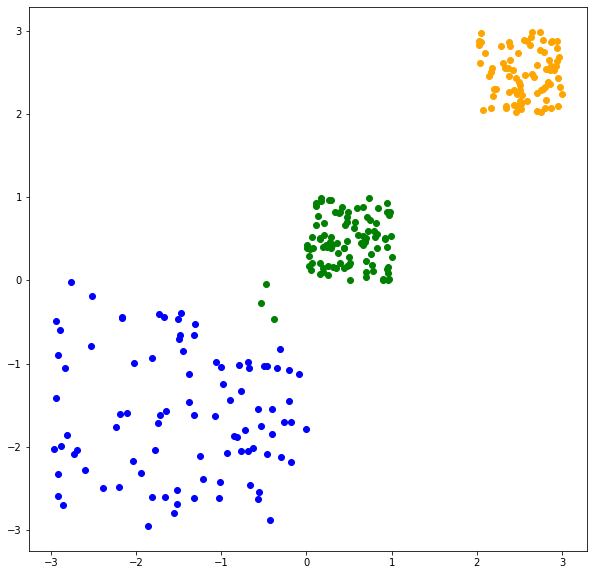

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
colors_clusters = ["orange", "blue", "green"]
for i, point in enumerate(X):
  plt.scatter([point[0]], [point[1]], c=colors_clusters[kmeans.labels_[i]])

Что, если поставить другое число кластеров?

In [8]:
kmeans = KMeans(n_clusters=4,random_state=0).fit(X)

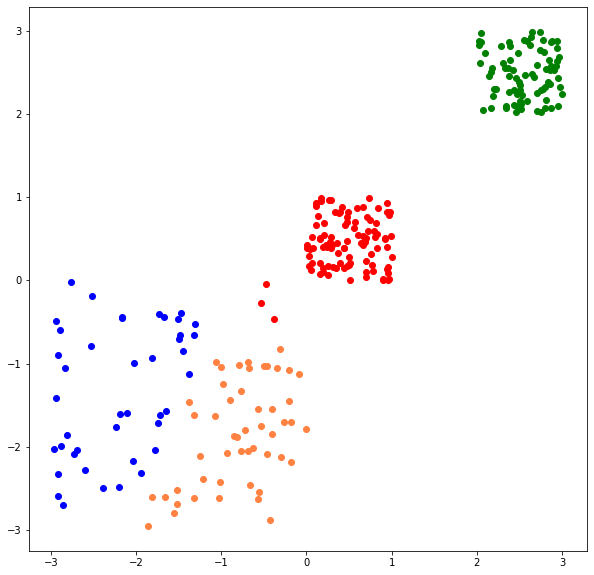

In [9]:
plt.figure(figsize=(10,10))

colors_clusters = ['g', 'b', 'r', '#ff8243']
for i,p in enumerate(X):
  plt.scatter([p[0]], [p[1]], c=colors_clusters[kmeans.labels_[i]])

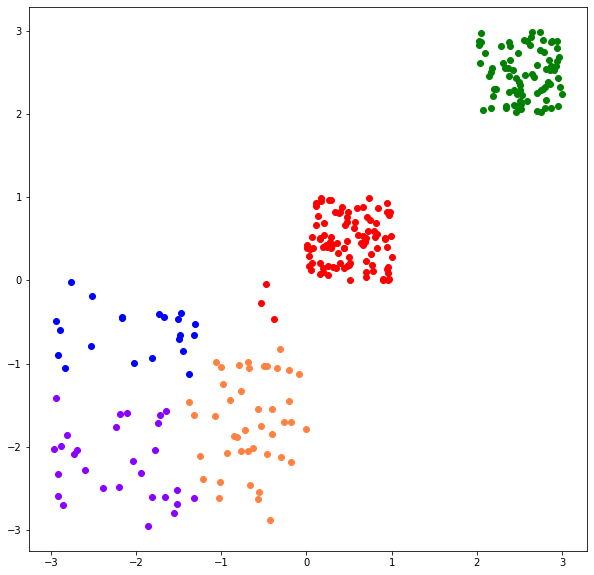

In [10]:
plt.figure(figsize=(10,10))

kmeans = KMeans(n_clusters=5,random_state=0).fit(X)
colors_clusters = ['g', 'b', 'r', '#ff8243', "#8b00ff"]
for i,p in enumerate(X):
  plt.scatter([p[0]], [p[1]], c=colors_clusters[kmeans.labels_[i]])

______________
> **Справка: EM-алгоритм**
> EM-алгоритм (Expectation-Maximization) - это алгоритм оценки оптимальных параметров некоторой модели Θ  по набору наблюдаемых переменных x при помощи введения вектора некоторых скрытых переменных G (то есть тех переменных, которые мы не можем непосредственно пронаблюдать, но можем некоторым образом оценить)

> Проведем аналогию с алгоритмом k-means: оптимальные параметры Θ задавали нам распределение точек по кластерам. Именно они и были искомыми метками кластеров. Скрытые переменные G задавали нам центры кластеров. Мы не могли пронаблюдать их напрямую, но могли оценить их при текущем приближении Θ. Наблюдаемые переменные представляли собой координаты точек, которые были в нашем датасете.
> EM-алгоритм, как и k-means, состоит из двух повторяющихся итеративно шагов:
> 0. Зададим начальное приближение параметров $Θ_0$
>
>>Пока не будет достигнута сходимость:
>>>1.Expectation: посчитаем ожидаемые значения скрытых переменных $G_i$ при условии текущего приближения $Θ_{i-1}$
>>>2. Maximization: решим задачу максимизации правдоподобия наблюдаемых значений x при условии скрытых переменных $G_i$. То есть $Θ_i = argmax(P(x|G_i, Θ))$

Алгоритм прекратит свою работу, когда изменения вектора параметров $Θ$ на некотором шаге станут несущественны
________________________________

# Иерархическая кластеризация

Идея иерархической кластеризации состоит в последовательном проведении некоторой итерационной процедуры, позволяющей на основе известного разбиения на N кластеров провести слияние наиболее близких из них (или же наоборот, разбить один из кластеров на 2 разных) получив разбиение на N-1 кластер (или же на N+1). Таким образом, мы получим последовательность разбиений на разное число кластеров нашей выборки и выберем наилучший (исходя из практических соображений) из ее элементов.

# Алгоритм Ланса-Уильямса

Алгоритм, реализующий вышеупомянутую итерационную процедуру и позволяющий проводить последовательное слияние кластеров при условии, что мы имеем некоторую функцию, позволяющую измерить расстояние между двумя кластерами (аналогична расстоянию для k-means). Назовем ее R(U,V), где U и V - некоторые кластеры.

> 1. Пусть сначала все кластеры одноэлементные. То есть каждый объект нашей выборки представляет собой отдельный кластер.
> 2. Повторим следующий пункт N-1 раз, где N - размер нашей выборки:
>> 3. Найдем два ближайших кластера в нашей структуре, согласно значению функции R(U, V), и сольем их в один кластер. Обозначим найденную кластерную структуру на данном шаге t как $C_t$.

На выходе этого алгоритма мы получаем последовательность разбиений на кластеры $C_1 ... C_N$, где разбиение $C_1$ - тривиальное разбиение на индивидуальные кластеры, $C_2$ - разбиение на N-1 индивидуальный кластер и 1 кластер, содержащий 2 точки и т.д., а $C_N$ - тривиальное разбиение на один единственный кластер, содержащий все объекты.

Для удобства визуализации такого варианта кластеризации часто используют специальную диаграмму, называемую дендрограммой.


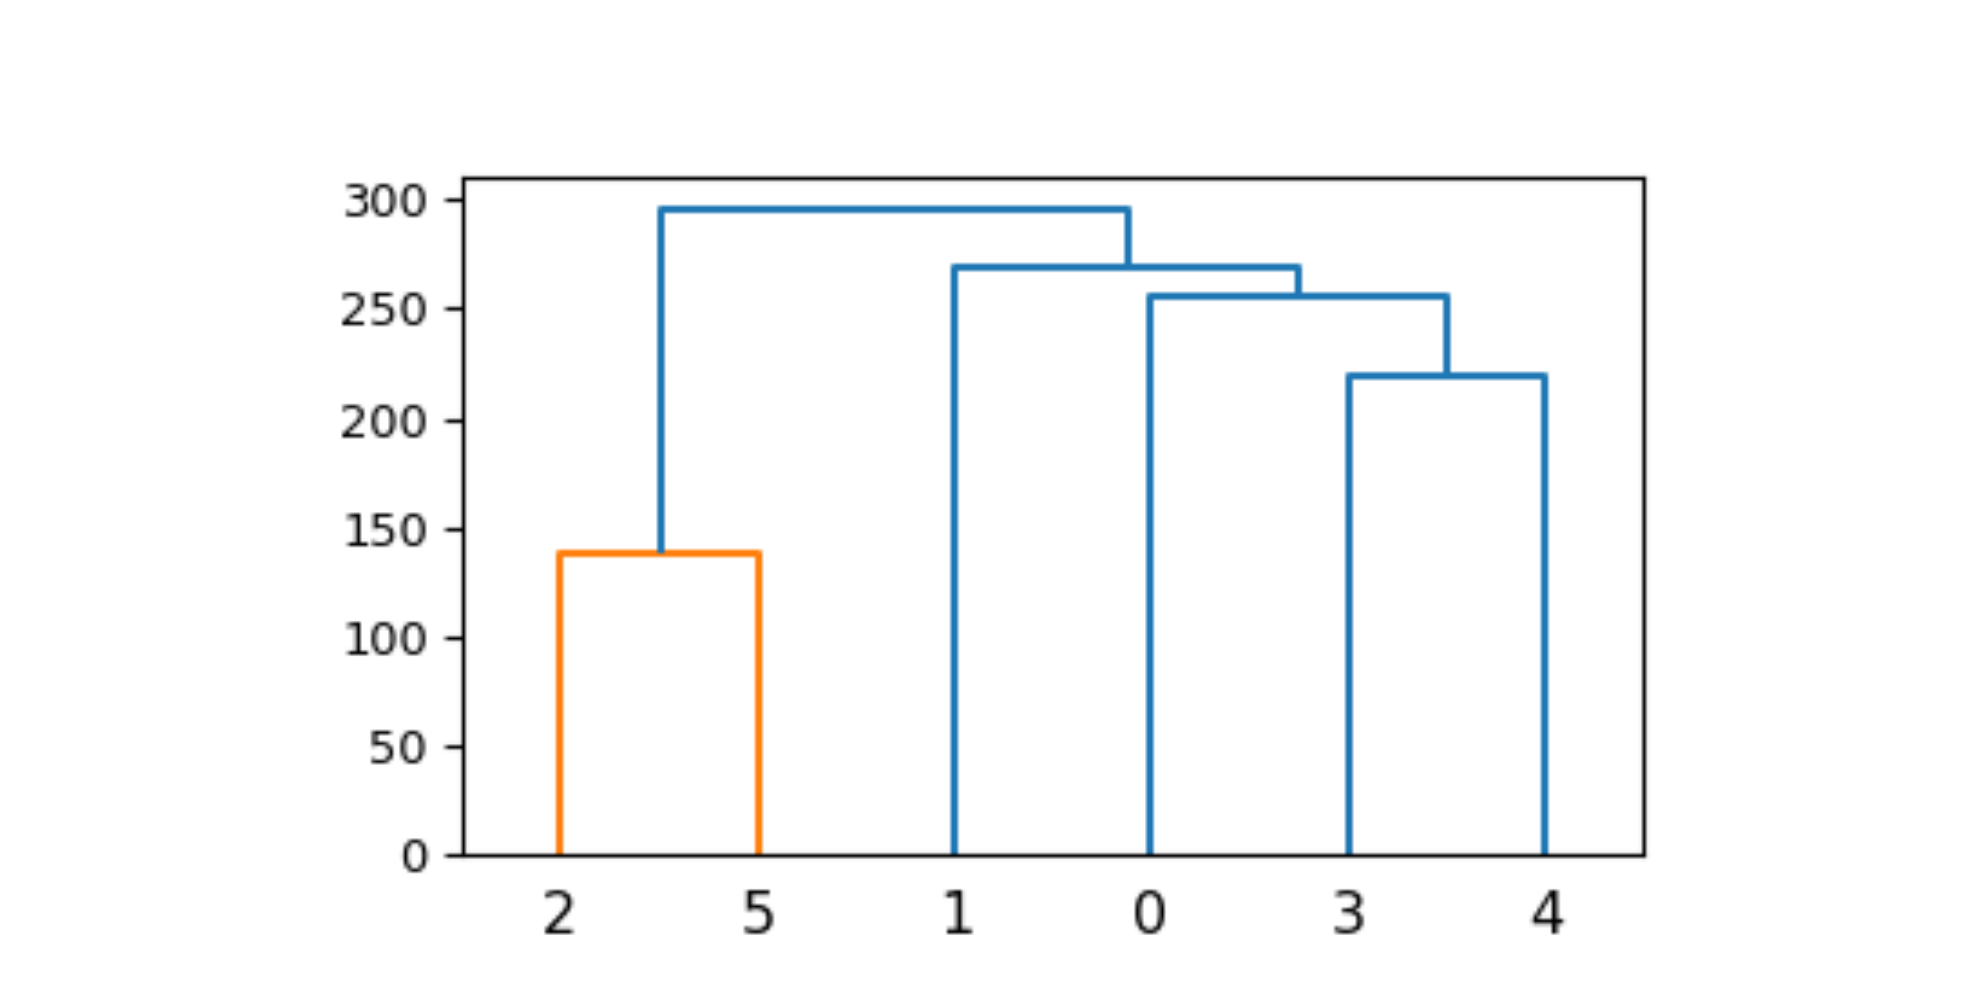

# Формула Ланса-Уильямса

Вернемся к вопросу измерения расстояние между кластерами. На самом деле существует довольно много различных вариантов.
Например,
* Расстояние до ближайшего соседа. R(U, V) = $\min\limits_{x \in U, y \in V}(\rho(x,y))$
* Расстояние до дальнего соседа. R(U, V) = $\max\limits_{x \in U, y \in V}(\rho(x,y))$
* Среднее групповое расстояние. R(U, V) = $\frac{1}{N}\sum\limits_{x \in U, y \in V}(\rho(x,y))$

Выбрать наиболее подходящий для нашей задачи вариант можно, исходя из эвристик, которые мы можем сформировать, учитывая наше знание предметной области или особенностей задачи. Также подбор нередко осуществляют простым перебором нескольких вариантов и определив, какая кластеризация минимизирует сумму расстояний от каждого объекта до центра его кластера.

Существует формула, позволяющая в общем виде описать все эти и многие другие способы подсчета расстояния между кластерами.

Будем считать, что кластер $W = U \bigcup V$. Будем также считать, что мы знаем расстояния между кластерами R(U, S) и R(V, S).

Тогда $$R(W, S) = α_U\times R(U,S) + α_V\times R(V,S) + β\times R(U,V) + γ\times |R(U,S) - R(V,S)|$$

Мы в этой формуле управляем коэффициентами $α_U, α_V, β, γ$

Например, если мы положим $α_U = α_V = \frac{1}{2}, β=0, γ=-\frac{1}{2}$, то мы получим формулу для расстояния до ближайшего соседа.
А при наборе коэффициентов $α_U = α_V = \frac{1}{2}, β=0, γ=\frac{1}{2}$ получим расстояние дальнего соседа.

# Реализация в scipy

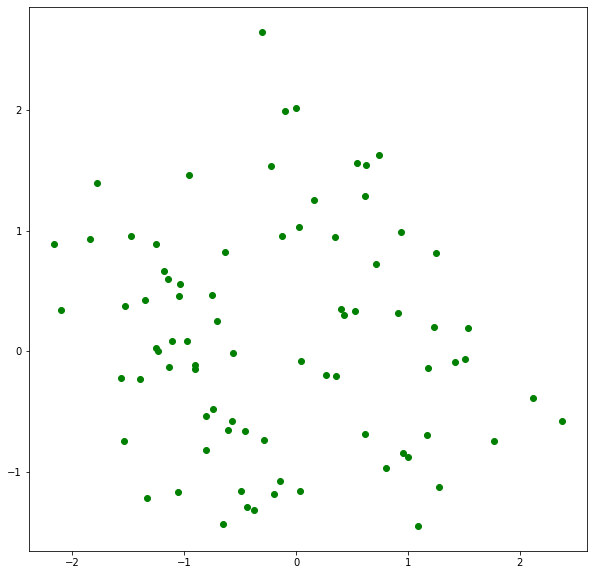

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))

X = np.random.randn(160).reshape(80, 2)

plt.scatter(X[:,0],X[:,1], color = "green")

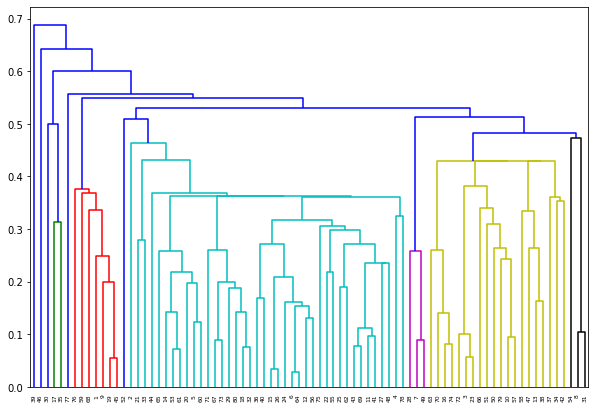

In [14]:
linked = linkage(X, 'single')
labels = range(1, len(X)+1)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labels,
            distance_sort='descending',
           )
plt.show()

# Снижение размерности

На практике аналитикам часто приходится сталкиваться с ситуацией, когда данные представлены в неоптимальной форме. Например, пусть существует некая полиномиальная зависимость цены автомобиля от суммы его мощности и максимальной скорости, и для нахождения этой зависимости к нам в руки попал датасет, содержащий сведения о максимальной скорости, мощности и цене нескольких тысяч машин. Конечно, мы можем пытаться решить поставленную задачу классическими методами ML, однако в таком случае искомая зависимость превратится в полином от двух переменных, и если он имеет достаточно высокую степень (хотя бы четвертую), задача (с учетом наличия зашумления данных) станет практически невыполнимой.

Однако если бы у нас был способ определить тот факт, что стоимость автомобиля зависит именно от суммы переменных, мы могли бы существенно упростить модель и помимо снижения ее вычислительной сложности получить неплохой прирост качества. На самом деле, такие способы есть, и задача снижения размерности данных решена несколькими методами в общем случае.
![](https://drive.google.com/file/d/1ahYt8Ddc2rJfj68nWx7yzyo5_1sHY3uR/view?usp=sharing)

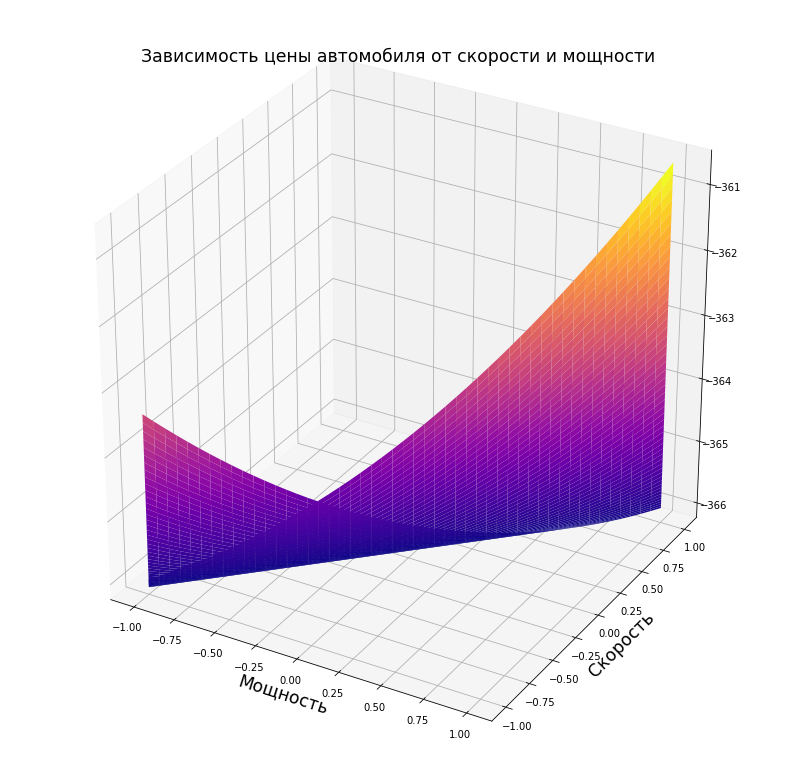

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

X = np.linspace(-1, 1)
Y = np.linspace(-1, 1)
X1, Y1 = np.meshgrid(X, Y)
Z = X1 + Y1
Z = Z**2 + 0.7 * Z - 366
fig = plt.figure(figsize = (14, 14))
ax = fig.add_subplot(1, 1, 1, projection = '3d')
plt.xlabel("Мощность", fontsize = "xx-large")
plt.ylabel("Скорость", fontsize = "xx-large")
plt.title("Зависимость цены автомобиля от скорости и мощности", fontsize = "xx-large")

ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = cm.plasma)
plt.show()

# Метод главных компонент, или Principal Component Analysis (PCA)

Идея настоящей лекции - поднять проблему снижения размерности и продемонстрировать ее решение на примере PCA. Суть данного метода заключается в проекции исходного признакового пространства на гиперплоскость меньшей размерности с максимальным сохранением дисперсии. В оригинале (Пирсон, 1901) для этого строится новая система координат по следующему алгоритму:
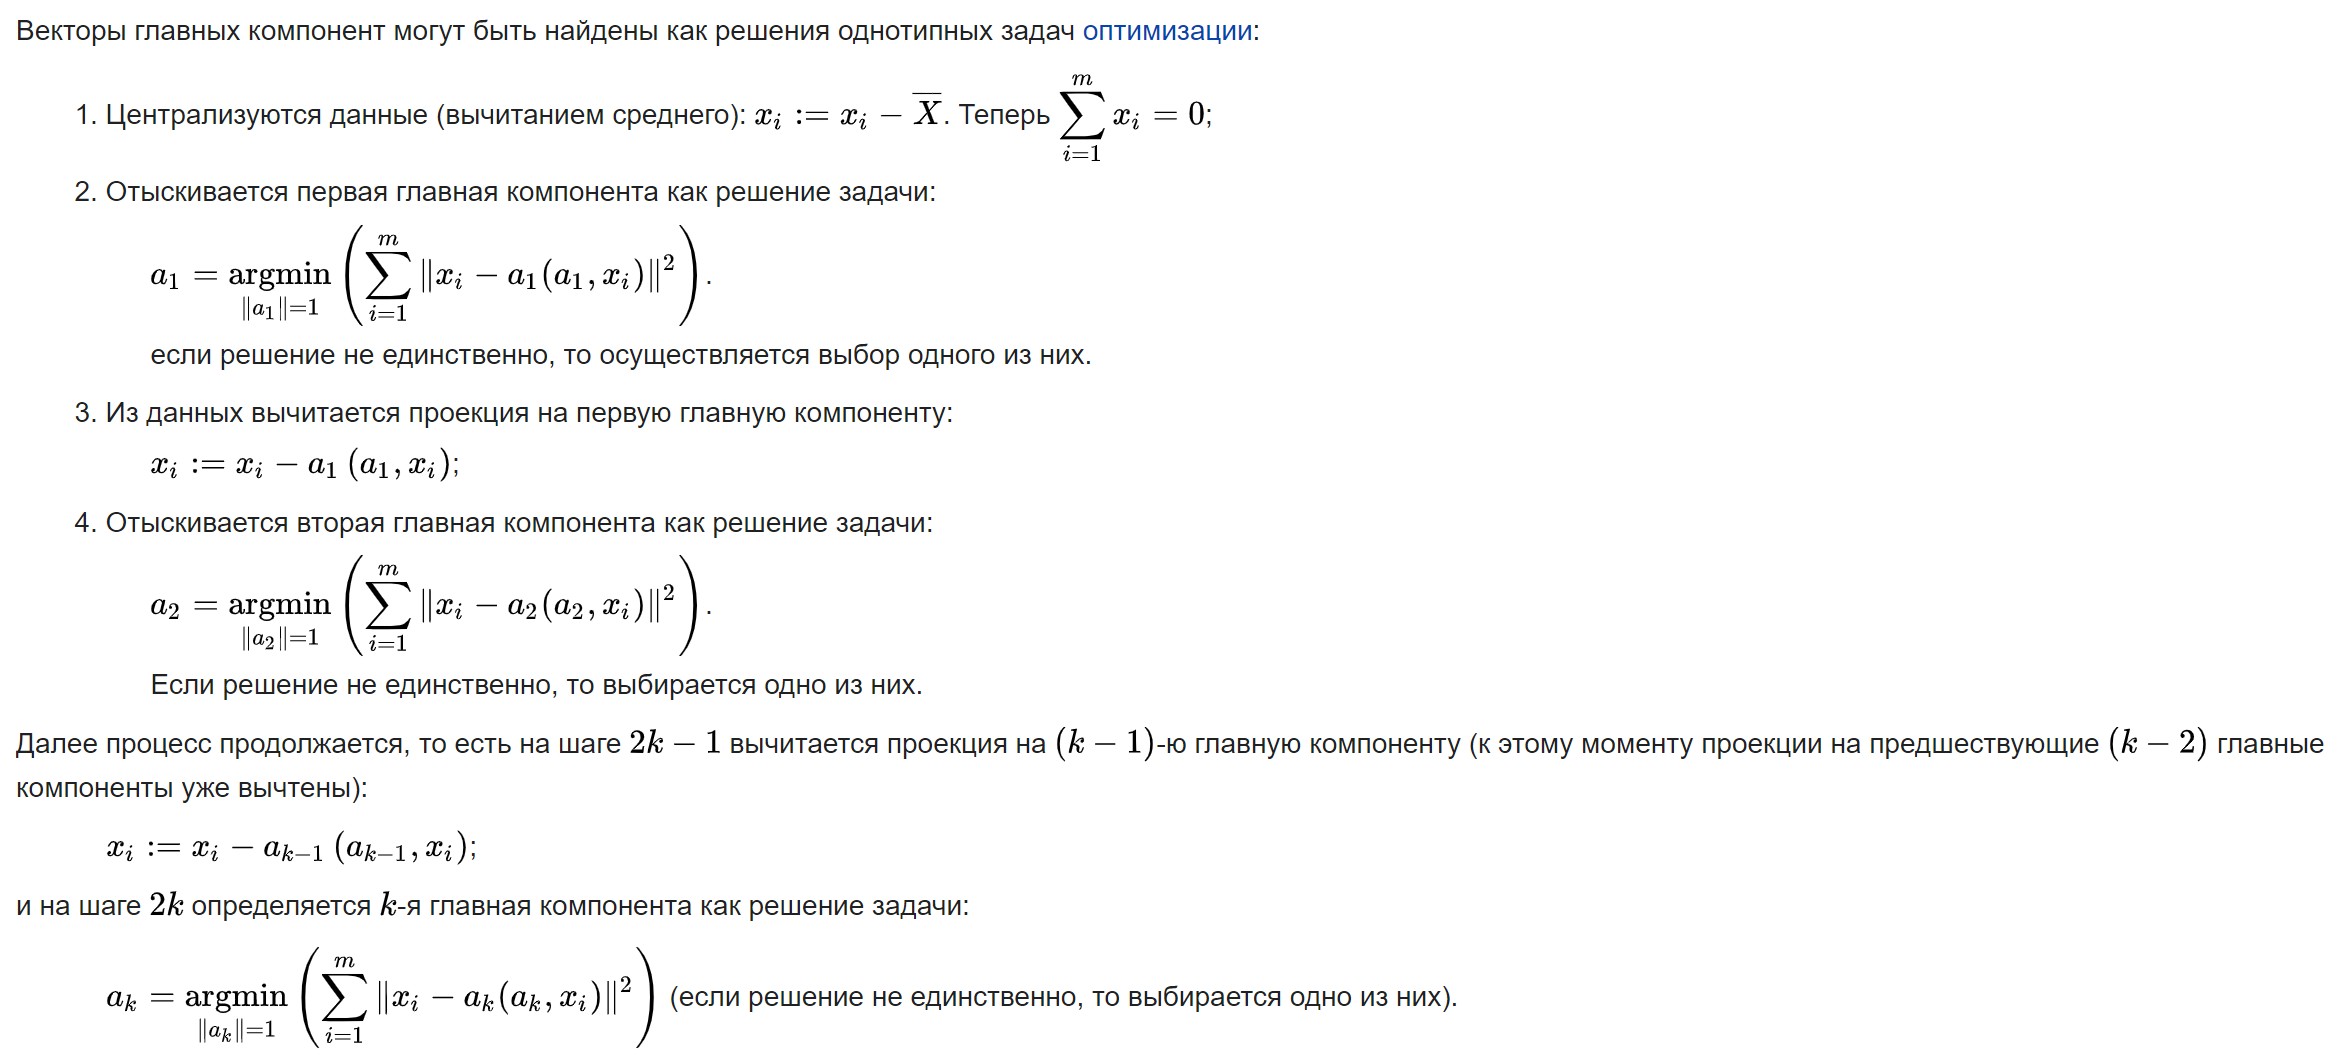



После этого для каждого вектора из построенного базиса считается дисперсия скалярных произведений этого вектора с каждым объектом выборки и базисные веткора сортируются в порядке убывания полученных дисперсий. Первые **k** векторов из полученного набора будут составлять базис гиперплоскости, проекция исходных данных на которую снизит их размерность, но при этом максимально сохранит дисперсию. Полученный результат ценен в силу того, что часто на практике признаки с большей дисперсией содержат больше информации (хотя порой более зашумлены).

# Реализация PCA на sklearn

(300, 2)


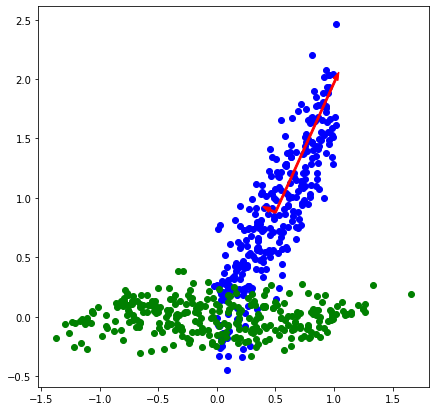

In [ ]:
from sklearn.decomposition import PCA

x = np.linspace(0, 1, 300) + 0.03 * np.random.randn(300,)
y = 1.7 * x + 0.3 * np.random.randn(300,)
data = np.vstack([x, y]).transpose()
print(data.shape)

pca = PCA()
pca.fit(data)
new_data = pca.transform(data)
components = pca.components_
variance = pca.explained_variance_

fig = plt.figure(figsize=(7, 7))
plt.scatter(x, y, color = "blue")
plt.scatter(new_data[:, 0], new_data[:,  1], color = "green")
plt.arrow(x.mean(), y.mean(), components[0][0] * variance[0] * 3, components[0][1] * variance[0] * 3, width = 0.015, color = "red", label = "Первая компонента")

plt.arrow(x.mean(), y.mean(), components[1][0] * variance[1] * 3, components[1][1] * variance[1] * 3, width = 0.015, color = "red", label = "Вторая компонента")
plt.show()


## Для снижения размерности

In [ ]:
# Проекция в пространство с фиксированной размерностью (в данном случае 5)
data = np.random.sample((1000, 50))
pca = PCA(n_components=5) 
pca.fit(data)
new_data = pca.transform(data)
print("Old data shape:", data.shape)
print("New data shape:", new_data.shape) 


Old data shape: (1000, 50)
New data shape: (1000, 5)


In [ ]:
# Сохранение заданной доли дисперсии (в данном случае 95%)
data = np.random.sample((1000, 50))
pca = PCA(n_components=0.95)
pca.fit(data)
new_data = pca.transform(data)
print("Old data shape:", data.shape)
print("New data shape:", new_data.shape)

Old data shape: (1000, 50)
New data shape: (1000, 47)


# Детектирование аномалий

В жизни из любого правила есть исключения, которые, как утверждает пословица, только подтверждают правила. Однако модели машинного обучения еще не научились понимать пословицы, поэтому для них каждый нетипичный объект (в особенности в обучающей выборке) является проблемой. 

Нахождение в выборке объектов, кардинально отличающихся от остальных помогает очищать от них обучающий набор и точнее выучивать правила, присущие **рядовым** объектам.

Однако граница между типичным и аномальным весьма спорна. Можно ли назвать британского кота весом в три килограмма аномально тяжелым? Вряд ли. А весом в пять килограмм? В семь? На практике порог "обычности" выставляется людьми исходя из здравого смысла, а машинное обучение помогает находить куда более нетривиальные случаи отклонений от нормы.

# Isolation Forest

Многие из вас наверняка знакомы с концепцией Random Forest, ее суть заключается в построении нескольких деревьев, осуществляющих разбиение объектов выборки на непересекающиеся группы при помощи решающих правил. Оказывается, эта идея может помочь и для нахождения аномалий - те объекты, которые обладают нетривиальными значениями признаков, как правило, быстро отличимы от остальных и, как следствие, попадают в ранние листы решающего дерева (наглядно этот процесс изображен на картинке ниже). Если теперь для каждого объекта мы посчитаем глубину листа дерева, в который он попал, и усредним это значение по всем деревьям из случайного леса, мы получим  меру аномальности объекта. Далее по выставленному человеком порогу объект либо классифицируется как нормальный, либо как выброс.

 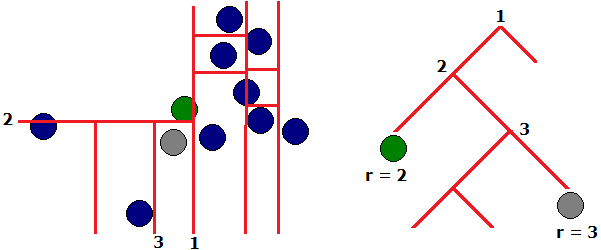

# Реализация на sklearn

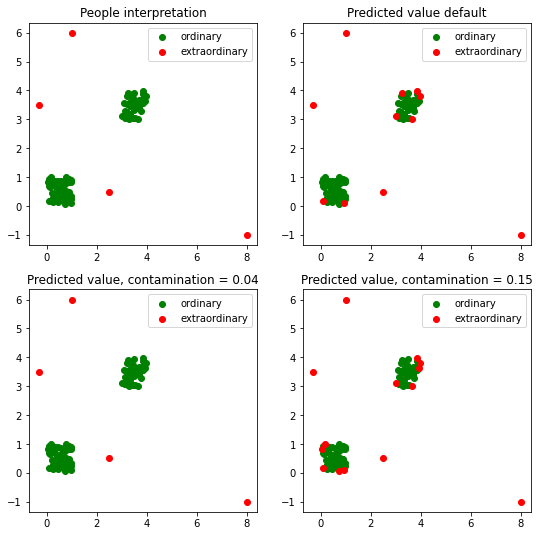

In [ ]:
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt

ordinary_1 = np.random.sample((50, 2))
ordinary_2 = np.random.sample((35, 2)) + 3
extraordinary = np.array([[2.5, 0.5], [8, -1], [-0.3, 3.5], [1, 6]])

data = np.vstack([ordinary_1, ordinary_2, extraordinary])
clf = IsolationForest()
clf.fit(data)
labels = clf.predict(data)
predict_ordinary = data[labels == 1]
predict_extraordinary = data[labels == -1]

clf = IsolationForest(contamination = 0.04)
clf.fit(data)
labels = clf.predict(data)
predict_ordinary_1 = data[labels == 1]
predict_extraordinary_1 = data[labels == -1]

clf = IsolationForest(contamination = 0.15)
clf.fit(data)
labels = clf.predict(data)
predict_ordinary_2 = data[labels == 1]
predict_extraordinary_2 = data[labels == -1]

fig, ax = plt.subplots(2, 2, figsize = (9, 9))
ax[0][0].scatter(ordinary_1[:, 0], ordinary_1[:, 1], color = "green", label = "ordinary")
ax[0][0].scatter(ordinary_2[:, 0], ordinary_2[:, 1], color = "green")
ax[0][0].scatter(extraordinary[:, 0], extraordinary[:, 1], color = "red", label = "extraordinary")
ax[0][0].set_title("People interpretation")
ax[0][0].legend()

ax[0][1].scatter(predict_ordinary[:, 0], predict_ordinary[:, 1], color = "green", label = "ordinary")
ax[0][1].scatter(predict_extraordinary[:, 0], predict_extraordinary[:, 1], color = "red", label = "extraordinary")
ax[0][1].set_title("Predicted value default")
ax[0][1].legend()

ax[1][0].scatter(predict_ordinary_1[:, 0], predict_ordinary_1[:, 1], color = "green", label = "ordinary")
ax[1][0].scatter(predict_extraordinary_1[:, 0], predict_extraordinary_1[:, 1], color = "red", label = "extraordinary")
ax[1][0].set_title("Predicted value, contamination = 0.04")
ax[1][0].legend()

ax[1][1].scatter(predict_ordinary_2[:, 0], predict_ordinary_2[:, 1], color = "green", label = "ordinary")
ax[1][1].scatter(predict_extraordinary_2[:, 0], predict_extraordinary_2[:, 1], color = "red", label = "extraordinary")
ax[1][1].set_title("Predicted value, contamination = 0.15")
ax[1][1].legend()

plt.show()